# Hall Effect

In [163]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal

"""
TODO:

- Uncertainty in drift velocities
- Conclusion
- Stitch things together

"""


def ave(x):
    # Takes numpy array and gets the absolute average
    return np.array([np.mean(np.abs(a)) for a in x])


# Calculating the line of best fit
def bestfit(data, x,y,sigma_x, sigma_y):
    # Calculates the line of best fit
    bf = np.zeros((2,len(data)))
    bf[0,:] = x**0
    bf[1,:] = x

    A = np.zeros((2,2))
    b = np.zeros(2)
    for k in range(2):
        for j in range(2):
            A[k,j] = np.sum(bf[k,:]*bf[j,:]/sigma_y**2) 
        b[k] = np.sum(y*bf[k,:]/sigma_y**2)

    A_inv = np.linalg.inv(A)
    a = np.linalg.solve(A,b)
    a_unc = np.sqrt(np.diag(A_inv))
    return a, a_unc

    

# Importing the data
data = np.genfromtxt("hall.csv", delimiter=",")

data1 = np.array(data[:,[0,1,2,3,4]]) # p-type
data2 = np.array(data[:6,[5,6,7,8,9]]) # n-type


# Model for the line of best fit (linear)
def model(p,x):
    return p[0] + p[1]*x


# Extracting data from imported file and calculate absolute mean

Ip = np.array(data1[:,0])
rms_vp1 = ave(np.array(data1[:,[1,2]]))
rms_vp2 = ave(np.array(data1[:,[3,4]]))

In = np.array(data2[:,0])
rms_vn1 = ave(np.array(data2[:,[1,2]]))
rms_vn2 = ave(np.array(data2[:,[3,4]]))


def calculate_uncertainties(a,b):
    # According to the hall effect set-up manual uncertainty in the reading is 0.1% +- one digit
    return a*0.001+0.1,b*0.001+0.1



# Calculating the line of best fit
def bestfit(data, x,y,sigma_x, sigma_y):
    bf = np.zeros((2,len(data)))
    bf[0,:] = x**0
    bf[1,:] = x

    A = np.zeros((2,2))
    b = np.zeros(2)
    for k in range(2):
        for j in range(2):
            A[k,j] = np.sum(bf[k,:]*bf[j,:]/sigma_y**2) 
        b[k] = np.sum(y*bf[k,:]/sigma_y**2)

    A_inv = np.linalg.inv(A)
    a = np.linalg.solve(A,b)
    a_unc = np.sqrt(np.diag(A_inv))[1]
    return a, a_unc

def hall_coefficient_unc(grad_unc, grad, B_unc, Z, B):
    return (Z/B)*np.sqrt(grad_unc**2+(0.005*grad)**2)


### VARS for B and Z

B2 = 227e-3
B1 = 214e-3

# Uncertainties according to the Gaussmeter manual
B1_sigma = 0.005*B1
B2_sigma = 0.005*B2

Z = 0.45/1000

# Calculates the hall constant
def get_hall_constant(grad, B):
    print("GRAD:", grad)
    return (grad*Z)/B


# Initialising arrays to put calculated values in
hall_coefficients = [0,0,0,0]
hall_coeff_unc = [0,0,0,0]



## Graph One: p-type 1

GRADIENT:  6.541601626715381
Y-INTERCEPT:  1.8074392569321824
GRAD: 6.541601626715381
R_h:  0.013755704355242624
0.0081730013816995
R_h Uncertainty:  7.089323763243006e-05


Text(2.5, 80, 'Gradient: 6.5416\n$R_h$: 0.0138')

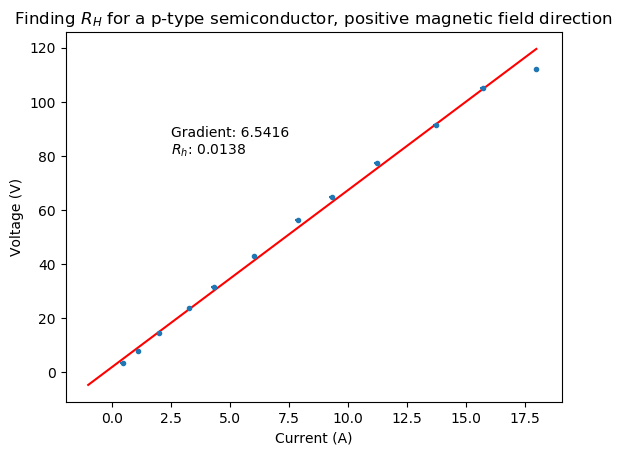

In [164]:
# Graph One: p-type 1



xx = np.linspace(-1,18,1000) # Range for line of best fit #CHANGE THIS

plt.rcdefaults()  # turn off xkcd
plt.figure()

B = B1
B_unc = B1_sigma

x = Ip
y = rms_vp1
sigma_x, sigma_y = calculate_uncertainties(x,y)

a, a_unc = bestfit(data1, x,y,sigma_x, sigma_y)

print("GRADIENT: ", a[1])
print("Y-INTERCEPT: ", a[0])
R_h = get_hall_constant(a[1], B)
print("R_h: ", R_h)
hall_coefficients[0] = R_h

print(a_unc)
R_h_unc = hall_coefficient_unc(a_unc, a[1], B_unc, Z, B)
print("R_h Uncertainty: ", R_h_unc)
hall_coeff_unc[0] = R_h_unc

plt.errorbar(x,y,sigma_y, sigma_x, fmt='.')
plt.plot(xx,model(a,xx),'r-')
plt.title("Finding $R_H$ for a p-type semiconductor, positive magnetic field direction")
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.annotate("Gradient: "+str(a[1].round(4))+'\n'+
             "$R_h$: "+str(R_h.round(4)), (2.5,80))
            

## Graph Two: p-type 2

GRADIENT:  10.350921370047477
Y-INTERCEPT:  1.0384121679803808
GRAD: 10.350921370047477
R_h:  0.020519447649873852
R_h Uncertainty:  0.00010441531333379104


Text(2.5, 80, 'Gradient: 10.3509\n$R_h$: 0.0205')

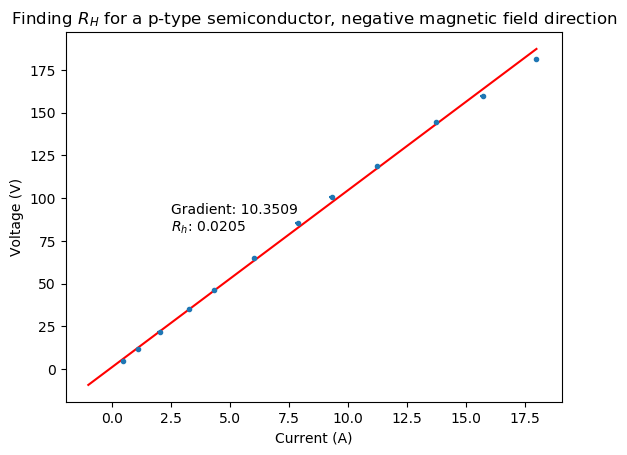

In [165]:
# Graph Two: p-type 2
xx = np.linspace(-1,18,1000) # Range for line of best fit #CHANGE THIS

plt.rcdefaults()  # turn off xkcd
plt.figure()

B = B2
B_unc = B2_sigma

x = Ip
y = rms_vp2
sigma_x, sigma_y = calculate_uncertainties(x,y)

a, a_unc = bestfit(data1, x,y,sigma_x, sigma_y)

print("GRADIENT: ", a[1])
print("Y-INTERCEPT: ", a[0])
R_h = get_hall_constant(a[1], B)
print("R_h: ", R_h)
hall_coefficients[1] = R_h

R_h_unc = hall_coefficient_unc(a_unc, a[1], B_unc, Z, B)
print("R_h Uncertainty: ", R_h_unc)
hall_coeff_unc[1] = R_h_unc

plt.errorbar(x,y,sigma_y, sigma_x, fmt='.')
plt.plot(xx,model(a,xx),'r-')
plt.title("Finding $R_H$ for a p-type semiconductor, negative magnetic field direction")
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.annotate("Gradient: "+str(a[1].round(4))+'\n'+
             "$R_h$: "+str(R_h.round(4)), (2.5,80))

## Graph Three: n-type 1

GRADIENT:  5.315579431207985
Y-INTERCEPT:  1.1786450829946487
GRAD: 5.315579431207985
R_h:  0.011177620299269128
R_h Uncertainty:  6.171093023951452e-05


Text(2.5, 80, 'Gradient: 5.3156\n$R_h$: 0.0112')

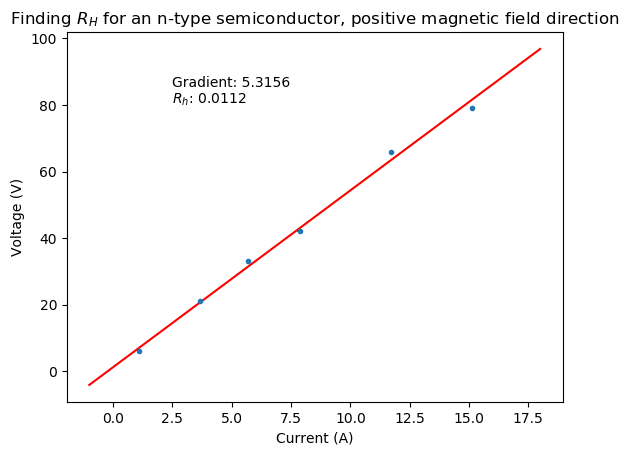

In [166]:
# Graph Three: n-type 1
xx = np.linspace(-1,18,1000) # Range for line of best fit #CHANGE THIS

plt.rcdefaults()  # turn off xkcd
plt.figure()

B = B1
B_unc = B1_sigma

x = In
y = rms_vn1
sigma_x, sigma_y = calculate_uncertainties(x,y)
#print(data[:6,[5,6,7,8]])

a, a_unc = bestfit(data2, x,y,sigma_x, sigma_y)


print("GRADIENT: ", a[1])
print("Y-INTERCEPT: ", a[0])
R_h = get_hall_constant(a[1], B)
print("R_h: ", R_h)
hall_coefficients[2] = R_h

R_h_unc = hall_coefficient_unc(a_unc, a[1], B_unc, Z, B)
print("R_h Uncertainty: ", R_h_unc)
hall_coeff_unc[2] = R_h_unc

plt.errorbar(x,y,sigma_y, sigma_x, fmt='.')
plt.plot(xx,model(a,xx),'r-')
plt.title("Finding $R_H$ for an n-type semiconductor, positive magnetic field direction")
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.annotate("Gradient: "+str(a[1].round(4))+'\n'+
             "$R_h$: "+str(R_h.round(4)), (2.5,80))

## Graph Four: 1-type 2

GRADIENT:  6.857984135382082
Y-INTERCEPT:  1.641384014447047
GRAD: 6.857984135382082
R_h:  0.013595122735338926
R_h Uncertainty:  7.303681971377625e-05


Text(2.5, 80, 'Gradient: 6.858\n$R_h$: 0.0136')

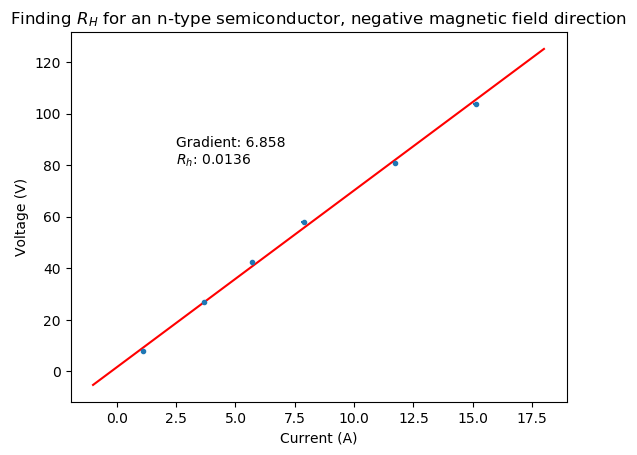

In [167]:
# Graph Four: 1-type 2
xx = np.linspace(-1,18,1000) # Range for line of best fit #CHANGE THIS

plt.rcdefaults()  # turn off xkcd
plt.figure()

B = B2
B_unc = B2_sigma

x = In
y = rms_vn2
sigma_x, sigma_y = calculate_uncertainties(x,y)

a, a_unc = bestfit(data2, x,y,sigma_x, sigma_y)

print("GRADIENT: ", a[1])
print("Y-INTERCEPT: ", a[0])
R_h = get_hall_constant(a[1], B)
print("R_h: ", R_h)
hall_coefficients[3] = R_h

R_h_unc = hall_coefficient_unc(a_unc, a[1], B_unc, Z, B)
print("R_h Uncertainty: ", R_h_unc)
hall_coeff_unc[3] = R_h_unc

plt.errorbar(x,y,sigma_y, sigma_x, fmt='.')
plt.plot(xx,model(a,xx),'r-')
plt.title("Finding $R_H$ for an n-type semiconductor, negative magnetic field direction")
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.annotate("Gradient: "+str(a[1].round(4))+'\n'+
             "$R_h$: "+str(R_h.round(4)), (2.5,80))

## Calculating Drift Velocity Ratio between semiconductor and copper

In [171]:
# Calculating Drift Velocity Ratio between semiconductor and copper


def drift_velocity_ratio(R_h):
    n_c = 8.5e28 # Charge carrier number density of copper
    q = 1.5e-19  # Charge on the charge carrier
    return n_c*q*R_h

def drift_velocity_unc(R_h_unc, R_h, vel):
    return (R_h_unc/R_h)*vel
    ### FINISH THIS
    

for index, coeff in enumerate(hall_coefficients):
    print("DRIFT VELOCITY RATIO ",index+1,": ", drift_velocity_ratio(coeff))
    print("UNCERTAINTY: ", drift_velocity_unc(hall_coeff_unc[index], hall_coefficients[index], drift_velocity_ratio(coeff)))
    print()

DRIFT VELOCITY RATIO  1 :  175385230.52934343
UNCERTAINTY:  903888.7798134831

DRIFT VELOCITY RATIO  2 :  261622957.5358916
UNCERTAINTY:  1331295.2450058355

DRIFT VELOCITY RATIO  3 :  142514658.81568137
UNCERTAINTY:  786814.3605538101

DRIFT VELOCITY RATIO  4 :  173337814.87557128
UNCERTAINTY:  931219.451350647

